*Import necessary libraries for the analysis*

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#uncomment the next line when using the 'base(root)' Anaconda environment which has the 'wordcloud' package installed
#from wordcloud import WordCloud, STOPWORDS

#uncomment the next line when using the 'geo_env' Anaconda environment which has the various geopanda packages installed
#import descartes
#import geopandas as gpd
#from shapely.geometry import Point, Polygon

*Use '%matplotlib inline', to display and store the plots within Jupyter notebook*

In [2]:
%matplotlib inline

*Load the AirBnB listings dataset using the pandas function "read_csv" and 
convert it into a DataFrame*

In [3]:
df_listings = pd.read_csv("listings_gz.csv")

Use the 'head()' method in order to have an overview of the first five rows of the DataFrame*

In [4]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35261,https://www.airbnb.com/rooms/35261,20230921043906,2023-09-21,city scrape,Rental unit in Thessaloniki · ★4.73 · 1 bedroo...,"<b>The space</b><br />My "" home"" is a fully f...",The neighborhood is very lively; there are man...,https://a0.muscache.com/pictures/2634706/75314...,151631,...,4.98,4.76,4.64,NaN,f,2,2,0,0,0.32
1,218831,https://www.airbnb.com/rooms/218831,20230921043906,2023-09-21,city scrape,Rental unit in Kalamaria · 3 bedrooms · 2 beds...,Experience the International Film Festival in ...,Park in front of the building,https://a0.muscache.com/pictures/1953829/3a860...,137588,...,5.00,5.00,5.00,00000049330,f,1,1,0,0,0.02
2,376955,https://www.airbnb.com/rooms/376955,20230921043906,2023-09-21,previous scrape,Rental unit in Thessaloniki · ★4.94 · 3 bedroo...,This is a 3 bedroom apartment in a lovely quit...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1894819,...,4.78,4.68,4.61,NaN,f,1,1,0,0,0.15
3,483128,https://www.airbnb.com/rooms/483128,20230921043906,2023-09-21,city scrape,Condo in Thessaloniki · ★4.80 · 1 bedroom · 1 ...,<b>The space</b><br />This cozy apartment has ...,The apartment is located in the heart of the c...,https://a0.muscache.com/pictures/5941836/084cc...,2358521,...,4.95,4.72,4.74,00000502736,f,1,1,0,0,2.70
4,494816,https://www.airbnb.com/rooms/494816,20230921043906,2023-09-21,city scrape,Rental unit in Ikismos Makedonia · ★4.73 · 2 b...,<b>The space</b><br />In a recently renovated ...,NaN,https://a0.muscache.com/pictures/61c5920c-7c3c...,1977386,...,4.83,4.43,4.81,00001900000,t,22,22,0,0,0.33


*Check for duplicate records*

In [5]:
df_listings[df_listings.duplicated()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


*Use 'info()' for more information on the DataFrame*

In [6]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3890 non-null   int64  
 1   listing_url                                   3890 non-null   object 
 2   scrape_id                                     3890 non-null   int64  
 3   last_scraped                                  3890 non-null   object 
 4   source                                        3890 non-null   object 
 5   name                                          3890 non-null   object 
 6   description                                   3885 non-null   object 
 7   neighborhood_overview                         1926 non-null   object 
 8   picture_url                                   3890 non-null   object 
 9   host_id                                       3890 non-null   i

*Use 'shape()' to find the number of rows and columns of the DataFrame*

In [7]:
df_rows_columns = df_listings.shape
print(f"The DataFrame has {df_rows_columns[0]} rows and {df_rows_columns[1]} columns.")

The DataFrame has 3890 rows and 75 columns.


*Prior to using the 'describe()' method in order to calculate a few statistical data on the "price" column, we have to remove the '$' and ',' symbols and then convert the datatype of the column from string to float using the 'astype()' function*

In [8]:
df_listings["price"] = df_listings["price"].str.replace(r"\$", "", regex=True).replace(r"\,", "", regex=True)

In [9]:
df_listings["price"] = df_listings["price"].astype(float)

In [10]:
df_listings["price"].describe()

count     3890.000000
mean        95.626478
std       1568.274246
min         10.000000
25%         43.000000
50%         55.000000
75%         75.000000
max      97590.000000
Name: price, dtype: float64

*We find a mean average price of around 95 dollars, but we also notice a standard deviation of almost 1570 dollars.\
This is caused by outliers that increase the overall spread of the data (a strong indication of that is the minimum price of 10 dollars and the maximum price of 97,590 dollars in the dataset).\
We also see that the second quartile (median) is equal to 55 dollars, and 75% of the listings have a price lower than 75 dollars, suggesting a positively skewed distribution caused by a few very highly priced listings.*

*Create a histogram that depicts the overall distribution of prices, excluding listings with a price over 500 dollars*

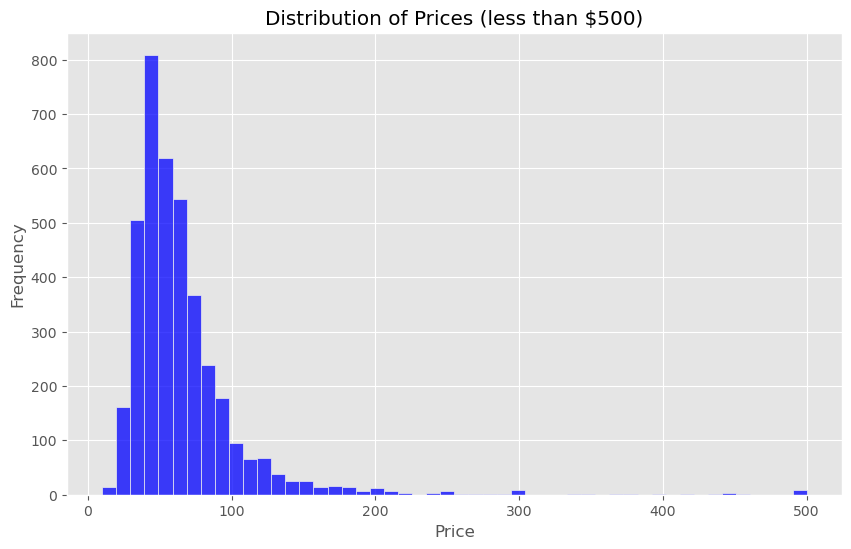

In [11]:
# Set the size and style of the plot
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")

# Add title and axis labels
plt.title("Distribution of Prices (less than $500)")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Create the histogram
sns.histplot(data=df_listings[df_listings["price"] <= 500], x="price", bins=50, color="blue");

*In order to find more info on the various Thessaloniki neighbourhoods, use the "neighbourhood_cleansed" column*

*Print the neighbourhood list using 'unique()'*

In [12]:
print(df_listings["neighbourhood_cleansed"].unique())

['Thessaloniki' 'Kalamaria' 'Neapolis – Sykeon' 'Pilea – Chortiatis'
 'Pavlou Mela' 'Ampelokipon – Menemeni' 'Kordelio – Evosmos']


*Create a countplot of the listings per neighbourhood using 'value_counts()'*

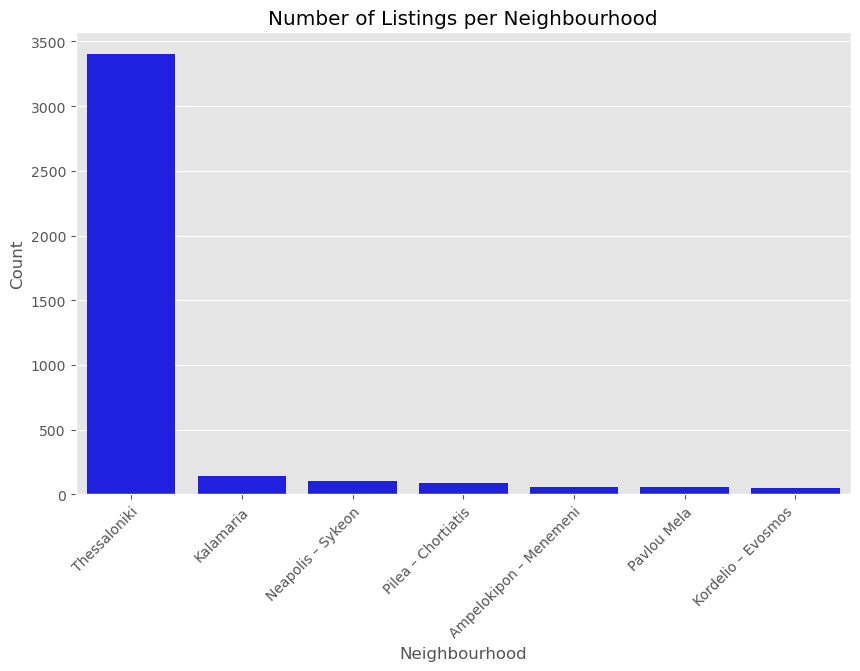

In [13]:
# Set the size and style of the plot
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")

# Add title and axis labels
plt.title("Number of Listings per Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

# Create the countplot
sns.countplot(data=df_listings, x="neighbourhood_cleansed", order=df_listings.neighbourhood_cleansed.value_counts().index, color="blue");

*The vast majority of listings are in Thessaloniki*

*Continue on, finding the average rental price in each neighbourhood while removing any possible outliers*

*Firstly find the Interquartile Range (IQR) and outlier bounds for the "price" column and then filter the outliers*

In [14]:
# Find the iqr using 'quantile()'
first_quant = df_listings["price"].quantile(0.25)
third_quant = df_listings["price"].quantile(0.75)
iqr = third_quant - first_quant

# Find the outlier bounds
lower_bound = first_quant - 1.5 * iqr
upper_bound = third_quant + 1.5 * iqr

# Create a new DataFrame with the filtered data
df_filtered_listings = df_listings[(df_listings["price"] >= lower_bound) & (df_listings["price"] <= upper_bound)]

*Check the statistical data of the filtered dataset*

In [15]:
df_filtered_listings["price"].describe()

count    3647.000000
mean       57.811900
std        21.359479
min        10.000000
25%        42.000000
50%        54.000000
75%        70.000000
max       123.000000
Name: price, dtype: float64

*Find the average rental prices using 'groupby' and 'mean()'*

In [16]:
df_filtered_listings.groupby("neighbourhood_cleansed")["price"].mean().sort_values(ascending=False)

neighbourhood_cleansed
Pilea – Chortiatis        65.267606
Kalamaria                 63.149606
Thessaloniki              57.907837
Kordelio – Evosmos        55.340426
Neapolis – Sykeon         54.145833
Pavlou Mela               49.732143
Ampelokipon – Menemeni    47.933333
Name: price, dtype: float64

*After removing the outliers, we find that the 'Pilea – Chortiatis' neighbourhood has the highest mean average prices*

*Create a barchart to visualize the above data*

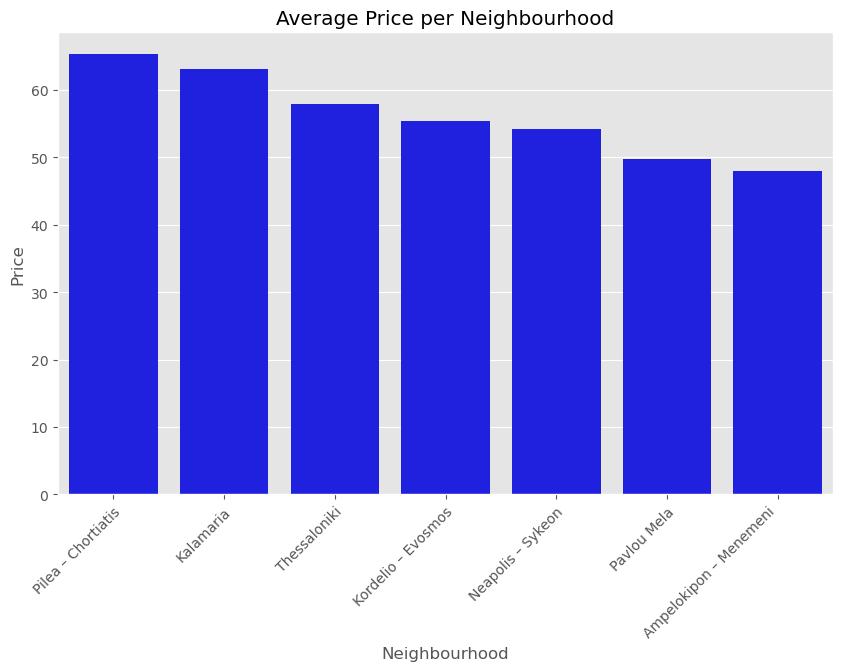

In [17]:
# Set the size and style of the plot
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")

# Add title and axis labels
plt.title("Average Price per Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

# Create the barplot
sns.barplot(x=df_filtered_listings.groupby("neighbourhood_cleansed")["price"].mean().sort_values(ascending=False).index, 
           y=df_filtered_listings.groupby("neighbourhood_cleansed")["price"].mean().sort_values(ascending=False).values, 
           color="blue");

*Use the "property_type" column in order to find the most common property types*

In [18]:
# Use 'value_counts' and 'nlargest()' for the top 10 property types
df_listings["property_type"].value_counts().nlargest(10)

property_type
Entire rental unit             2255
Entire condo                   1258
Entire home                     110
Camper/RV                        39
Private room in rental unit      38
Entire serviced apartment        36
Entire loft                      23
Private room in condo            21
Boat                             14
Tiny home                        12
Name: count, dtype: int64

*'Entire rental unit' is the most common property type, followed by 'Entire condo' and 'Entire home'\
Visualize the results using a barplot*

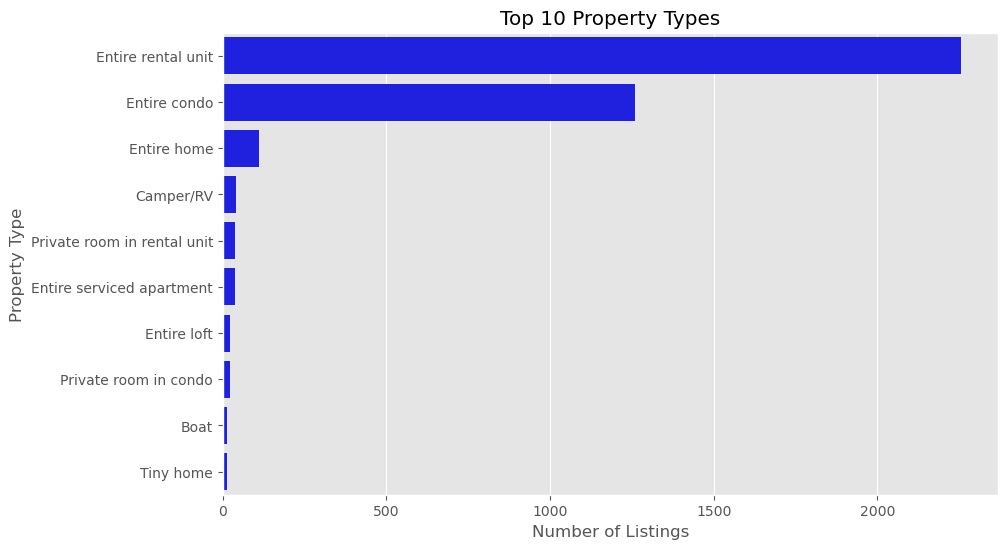

In [19]:
# Set the size and style of the plot
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")

# Add title and axis labels
plt.title("Top 10 Property Types")
plt.xlabel("Number of Listings")
plt.ylabel("Property Type")

# Create the barplot
sns.barplot(x=df_listings["property_type"].value_counts().nlargest(10).values, 
           y=df_listings["property_type"].value_counts().nlargest(10).index, 
           color="blue");

*Find the average rental price for each property type while removing any possible outliers, using 'the df_filtered_listings' DataFrame*

*Create a new DataFrame that contains only the top 10 property types*

In [20]:
df_top10_types_filtered_listings = df_filtered_listings[df_filtered_listings.groupby("property_type")["property_type"].transform("size") >= 12]

*Find the mean average price for each of those property types excluding outliers*

In [21]:
df_top10_types_filtered_listings.groupby("property_type")["price"].mean().sort_values(ascending=False)

property_type
Tiny home                      61.666667
Entire home                    61.595745
Entire condo                   58.571188
Entire rental unit             57.915334
Entire serviced apartment      57.787879
Camper/RV                      50.487179
Entire loft                    50.409091
Boat                           46.357143
Private room in condo          40.600000
Private room in rental unit    38.378378
Name: price, dtype: float64

*The property type 'Tiny home' has the highest mean average price among the top 10 most common property types, followed by 'Entire home' and 'Entire condo'\
Visualize the results using a barplot*

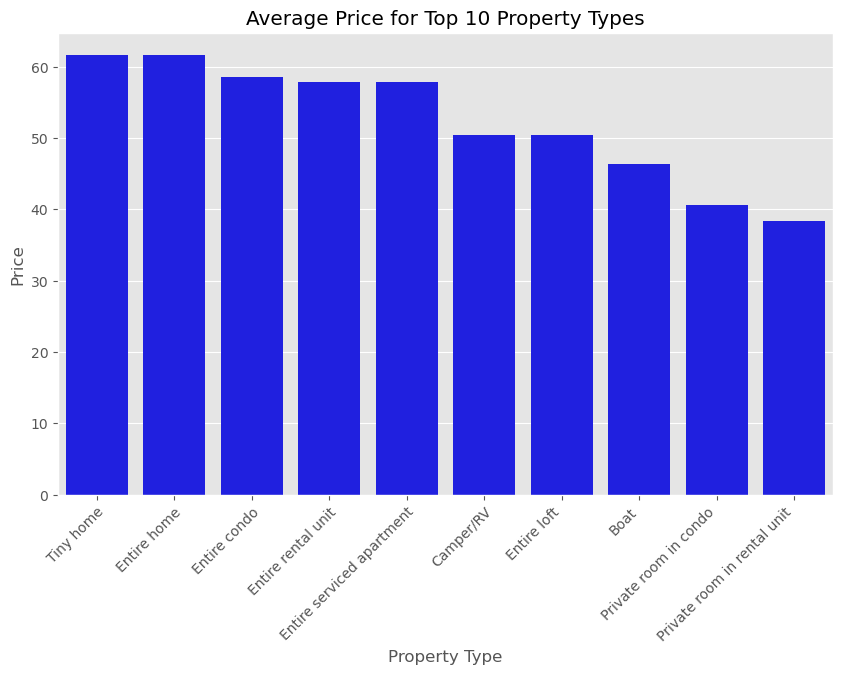

In [22]:
# Set the size and style of the plot
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")

# Add title and axis labels
plt.title("Average Price for Top 10 Property Types")
plt.xlabel("Property Type")
plt.ylabel("Price")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

# Create the barplot
sns.barplot(x=df_top10_types_filtered_listings.groupby("property_type")["price"].mean().sort_values(ascending=False).index, 
           y=df_top10_types_filtered_listings.groupby("property_type")["price"].mean().sort_values(ascending=False).values, 
           color="blue");

*Find the host ownership distribution\
Use the 'host_name' column to find the number of listings for each host and 'describe()' to further explore the results*

In [23]:
df_listings["host_name"].value_counts().describe()

count    957.000000
mean       4.064786
std       11.206598
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      215.000000
Name: count, dtype: float64

*According to the dataset there are 957 unique hosts, the average listings per host are approximately 4.06, and the standard deviation is approximately 11.2 listings\
50% of the hosts have a single listing and the max number of listings from a single host is 215*

*Create a pie chart that depicts the number of listings belonging to the top 10 owners*

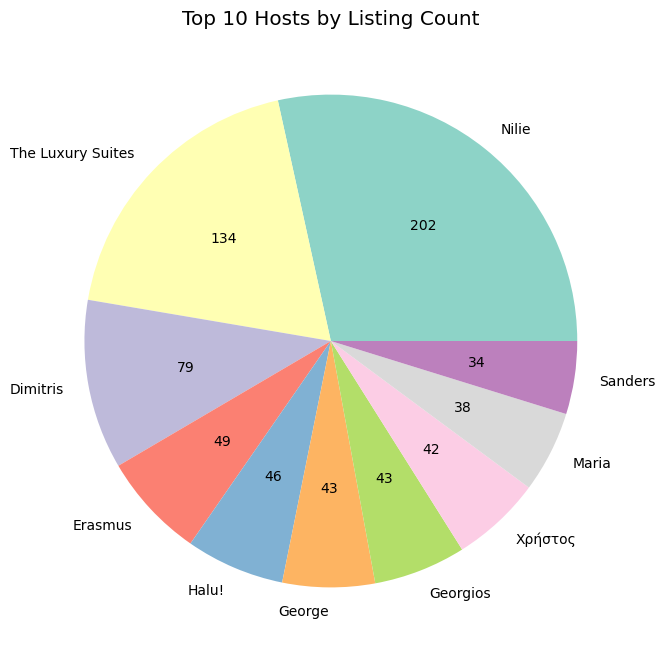

In [24]:
# Set the size and style of the plot
plt.figure(figsize=(8, 8))
plt.style.use("ggplot")

# Add title and axis labels
plt.title("Top 10 Hosts by Listing Count")

# Create the pie chart
pie_values = df_listings["host_id"].value_counts().nlargest(10).values
pie_labels = df_listings["host_name"].value_counts().nlargest(10).index
plt.pie(x=pie_values, labels=pie_labels, colors=sns.color_palette('Set3'), autopct=lambda p: '{:.0f}'.format((p / 100) * pie_values.sum()));

*Create correlation heatmaps in order to search for possible relationships between 'price' and the other variables and explore those further\
Create two heatmaps (one with and one without 'price' outliers) from the relevant DataFrame columns*

Begin with the column 'bathrooms_text'\
Edit the column in order to only contain the number of bathrooms*

In [25]:
# Create the new DataFrame as a deep copy of the original
df_listings_corr = df_listings.copy(deep=True)

In [26]:
# Create a dictionary for the two strings that don't contain numerical values for the listing's bathrooms
replacements = {"Half-bath": "0.5 baths", "Shared half-bath": "0.5 baths"}

# Replace the two non-numerical strings in the column
df_listings_corr["bathrooms_text"] = df_listings_corr["bathrooms_text"].replace(replacements, regex=True)

In [27]:
# Check the column
df_listings_corr["bathrooms_text"].value_counts()

bathrooms_text
1 bath              3260
1.5 baths            337
2 baths              171
1 private bath        50
1 shared bath         24
2.5 baths             11
3 baths                9
0 baths                8
0.5 baths              7
1.5 shared baths       5
2 shared baths         4
4 baths                2
5 baths                1
3.5 baths              1
Name: count, dtype: int64

In [28]:
# Remove all letters from the column
df_listings_corr["bathrooms_text"] = df_listings_corr["bathrooms_text"].str.replace("[a-zA-Z]", "", regex=True)

In [29]:
# Convert the column datatype to float
df_listings_corr["bathrooms_text"] = df_listings_corr["bathrooms_text"].astype(float)

In [30]:
# Check the altered column
df_listings_corr["bathrooms_text"].value_counts()

bathrooms_text
1.0    3334
1.5     342
2.0     175
2.5      11
3.0       9
0.0       8
0.5       7
4.0       2
5.0       1
3.5       1
Name: count, dtype: int64

*Continue on with the 'amenities' column\
Convert the string into a list using 'split()', in order to explore if the number of amenitities affect the price*

In [31]:
df_listings_corr["amenities"] = df_listings_corr["amenities"].apply(lambda x: x[1: -1].split(","))

*Use 'len()' to substitute the list of amenities provided with a count of them*

In [32]:
df_listings_corr["amenities"] = df_listings_corr["amenities"].str.len()

*Fill empty values in columns 'bedrooms' and 'beds'\
Find how many 'NaN' values the two columns have*

In [33]:
df_listings_corr["bedrooms"].isna().sum()

464

In [34]:
df_listings_corr["beds"].isna().sum()

27

*Use 'fillna()' and 'median()' to replace the 'NaN' values*

In [35]:
df_listings_corr["bedrooms"] = df_listings_corr["bedrooms"].fillna(df_listings_corr["bedrooms"].median())
df_listings_corr["beds"] = df_listings_corr["beds"].fillna(df_listings_corr["beds"].median())

*Fill empty values in 'review_scores_rating' column\
Find the number of 'NaN' values*

In [36]:
df_listings_corr["review_scores_rating"].isna().sum()

485

*Replace the 'NaN' values*

In [37]:
df_listings_corr["review_scores_rating"] = df_listings_corr["review_scores_rating"].fillna(df_listings_corr["review_scores_rating"].median())

*Imputing missing values using median, guarantees data quality and integrity while taking outliers into account.*

*Create the two correlation heatmaps*

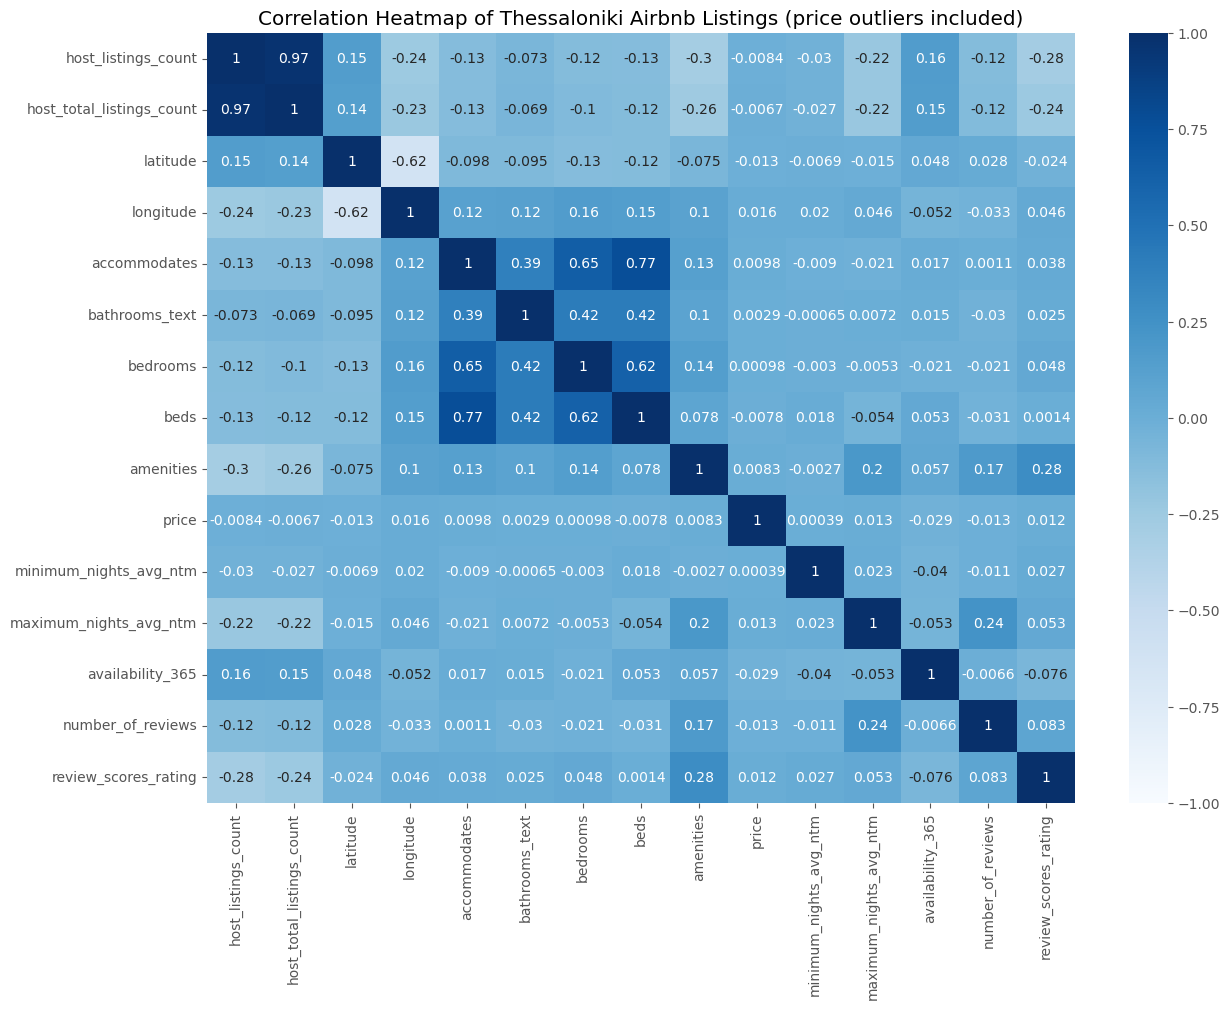

In [38]:
# Set the size and style of the plot
plt.figure(figsize=(14, 10))
plt.style.use("ggplot")

# Add title
plt.title("Correlation Heatmap of Thessaloniki Airbnb Listings (price outliers included)")

# Create the heatmap
sns.heatmap(data=df_listings_corr[["host_listings_count", "host_total_listings_count", "latitude", "longitude", 
                              "accommodates", "bathrooms_text", "bedrooms", "beds", "amenities", "price", 
                              "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "availability_365", 
                              "number_of_reviews", "review_scores_rating" ]].corr(numeric_only=True),vmin=-1, vmax=1, cmap="Blues", annot=True);

*Remove the 'price' outliers for the second correlation heatmap*

In [39]:
# Find the iqr using 'quantile()'
first_quant = df_listings_corr["price"].quantile(0.25)
third_quant = df_listings_corr["price"].quantile(0.75)
iqr = third_quant - first_quant

# Find the outlier bounds
lower_bound = first_quant - 1.5 * iqr
upper_bound = third_quant + 1.5 * iqr

# Create a new DataFrame with the filtered data
df_filtered_listings_corr = df_listings_corr[(df_listings_corr["price"] >= lower_bound) & (df_listings_corr["price"] <= upper_bound)]

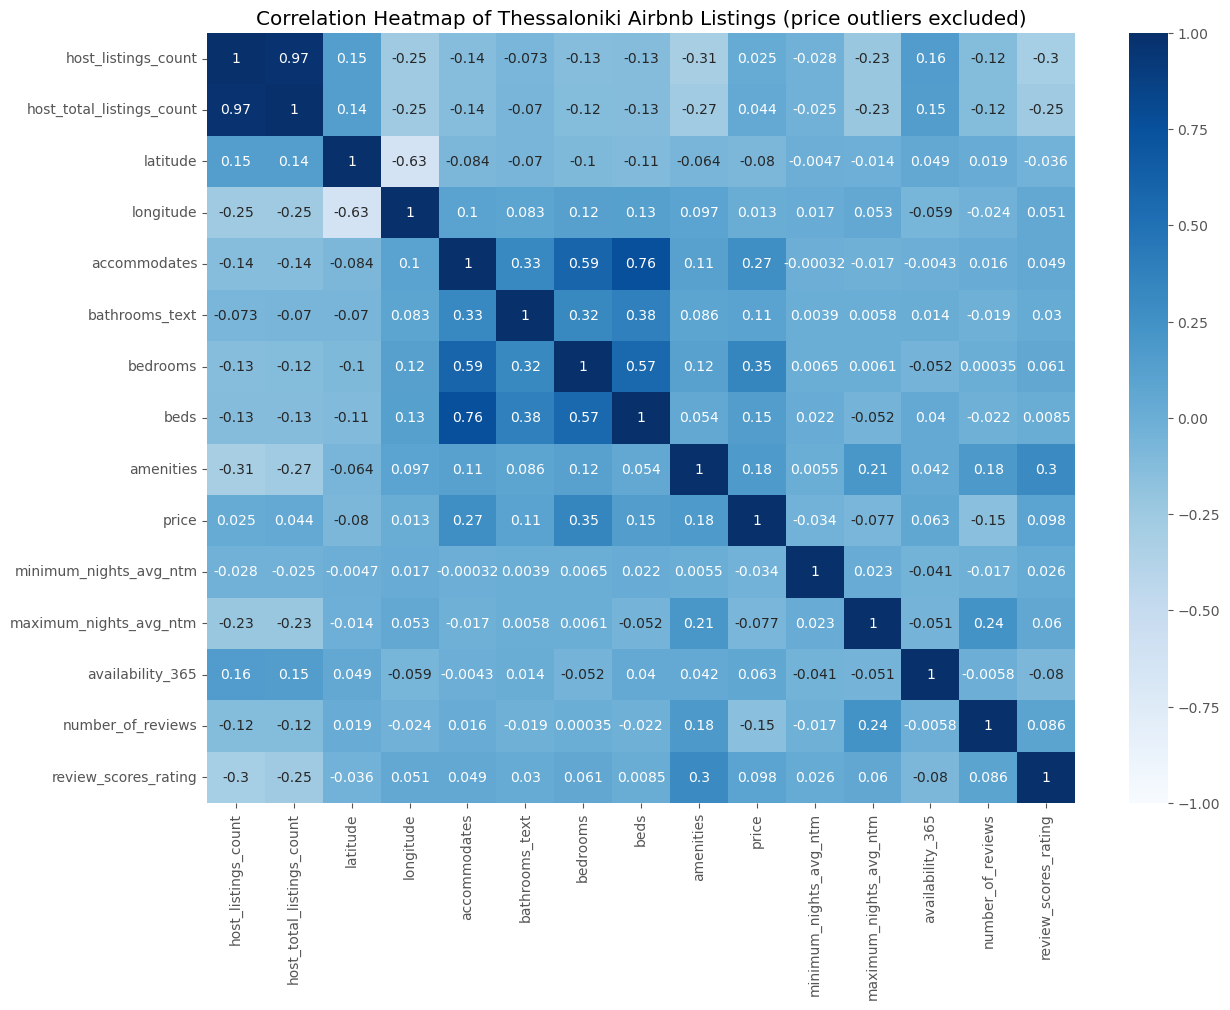

In [40]:
# Set the size and style of the plot
plt.figure(figsize=(14, 10))
plt.style.use("ggplot")

# Add title
plt.title("Correlation Heatmap of Thessaloniki Airbnb Listings (price outliers excluded)")

# Create the heatmap
sns.heatmap(data=df_filtered_listings_corr[["host_listings_count", "host_total_listings_count", "latitude", "longitude", 
                              "accommodates", "bathrooms_text", "bedrooms", "beds", "amenities", "price", 
                              "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "availability_365", 
                              "number_of_reviews", "review_scores_rating" ]].corr(numeric_only=True),vmin=-1, vmax=1, cmap="Blues", annot=True);

*Although the first correlation heatmap didn't reveal any relationships between 'price and the other variables,\
after removing the 'price' outliers we find a correlation coefficient for the columns 'price' and 'accomodates' equal to 0.27\
and a correlation coefficient for the columns 'price' and 'bedrooms' equal to 0.35 which indicates a moderate positive linear relationship\
Let's explore the relationship between 'price' and 'bedrooms' further*

*Find the overall distribution of bedrooms in the listings*

In [41]:
df_filtered_listings_corr["bedrooms"].value_counts()

bedrooms
1.0     2725
2.0      767
3.0      138
4.0       10
5.0        4
10.0       3
Name: count, dtype: int64

*Create a boxplot that depicts the relationship between the number of bedrooms and price of a listing*

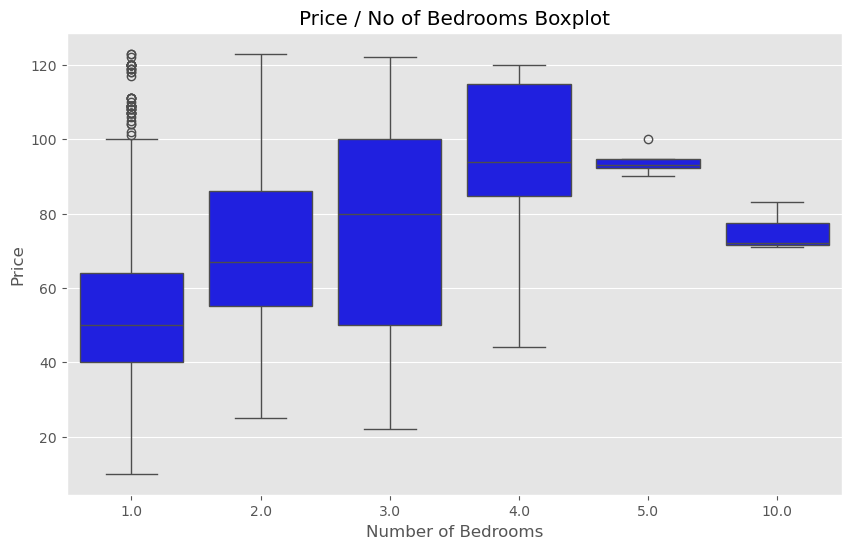

In [42]:
# Set the size and style of the plot
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")

# Add title and axis labels
plt.title("Price / No of Bedrooms Boxplot")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")

# Create the violin plot
sns.boxplot(data=df_filtered_listings_corr, x="bedrooms", y="price", color="blue");

*From the data and the boxplot we see that in the dataset exist three listings with ten bedrooms*

*Examine the 'accommodate' column of these listings*

In [43]:
df_filtered_listings_corr["accommodates"].loc[df_filtered_listings_corr["bedrooms"]>5]

1023    3
1024    2
1066    3
Name: accommodates, dtype: int64

*The 'accomodate' column (showing accommodation for either two or three people in those listings) implies that the number of bedrooms is not 10\
According to the boxplot, their median price is lower than the median price of listings with five, four and even three bedrooms\
From these points we can assume that these listings have one bedroom, instead of ten\
We can safely remove them from the boxplot, due to their low count*

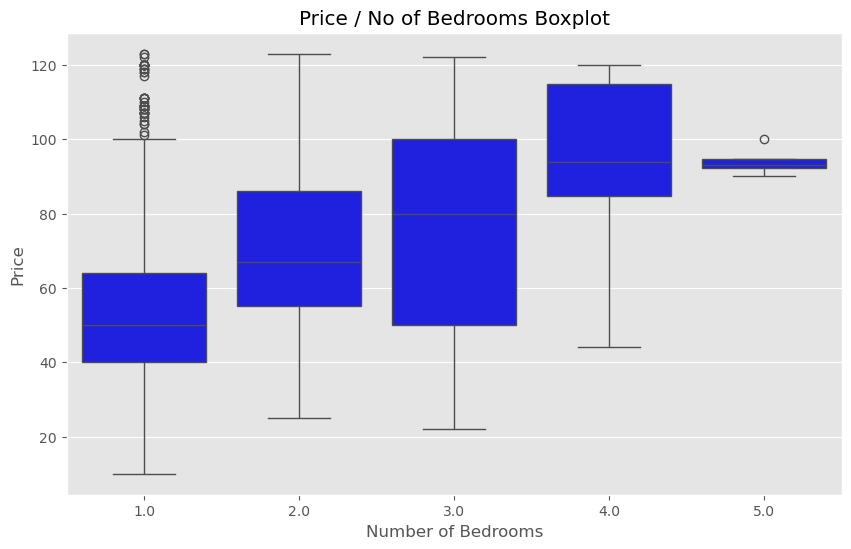

In [44]:
# Set the size and style of the plot
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")

# Add title and axis labels
plt.title("Price / No of Bedrooms Boxplot")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")

# Create the violin plot
sns.boxplot(data=df_filtered_listings_corr[df_filtered_listings_corr["bedrooms"]<=5], x="bedrooms", y="price", color="blue");

*After filtering the boxplot we notice that listings with one bedroom, have the most outliers\
Also the four bedroom listings have a longer lower whisker, indicating a wide range of values from the lower bound up to the 25th percentile*

*Check the overall and per neighbourhood number of reviews*

In [45]:
# Overall number of reviews
df_filtered_listings_corr["number_of_reviews"].sum()

155426

In [46]:
# Number of reviews for each neighbourhood
df_filtered_listings_corr.groupby("neighbourhood_cleansed")["number_of_reviews"].sum()

neighbourhood_cleansed
Ampelokipon – Menemeni      1723
Kalamaria                   4607
Kordelio – Evosmos          1856
Neapolis – Sykeon           3172
Pavlou Mela                 1443
Pilea – Chortiatis          1901
Thessaloniki              140724
Name: number_of_reviews, dtype: int64

*The vast majority of reviews are about listings in Thessaloniki, since most listings are in that neighbourhood*

*Use 'review_scores_rating' to find if a better review score equates with a higher listing price\
Create five 'review_scores_rating' rank categories using the 'cut()' method and add a new column in the DataFrame to further explore tha data*

In [49]:
review_rank = pd.cut(x=df_filtered_listings_corr["review_scores_rating"], bins=5,
                   labels=["Poor", "Fair", "Good", "Very Good", "Excellent"])

#Add the new column to the DataFrame
df_filtered_listings_corr.loc[:, "listing_review_rank"] = review_rank

In [50]:
#Reset the index since the DataFrame was filtered
df_filtered_listings_corr.reset_index(drop=True, inplace=True)

*Check the data using 'describe()' and then use the new column to create a barplot of the average prices for each review rank*

In [51]:
df_filtered_listings_corr.groupby("listing_review_rank", observed=True)["price"].describe()

,count,mean,std,min,25%,50%,75%,max
listing_review_rank,,,,,,,,
Poor,10.0,59.000000,21.312490,35.0,42.75,49.5,82.0,85.0
Fair,7.0,44.571429,13.938641,25.0,35.50,47.0,53.5,62.0
Good,57.0,53.456140,21.908959,24.0,39.00,45.0,64.0,120.0
Very Good,211.0,53.421801,20.031577,10.0,40.00,46.0,63.5,120.0
Excellent,3362.0,58.185306,21.406561,11.0,43.00,54.0,70.0,123.0


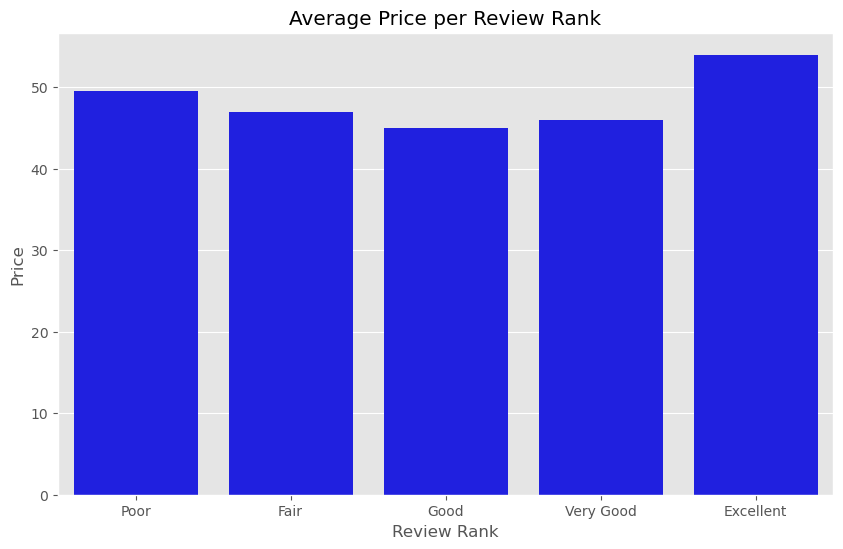

In [52]:
# Set the size and style of the plot
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")

# Add title and axis labels
plt.title("Average Price per Review Rank")
plt.xlabel("Review Rank")
plt.ylabel("Price")

# Create the barplot
sns.barplot(x=df_filtered_listings_corr.groupby("listing_review_rank", observed=True)["price"].median().index, 
           y=df_filtered_listings_corr.groupby("listing_review_rank", observed=True)["price"].median().values, 
           color="blue");

*If 'mean()' is used to find the average prices, poorly rated listings have the highest price among all other review ranks\
Excellent rated listings are the most expensive if 'median()' is used, with listings rated 'poor' coming second this time*

*Create a word cloud from the amenities found in the DataFrame (Select all the text and press Ctrl + / to uncomment code and use wordcloud)*

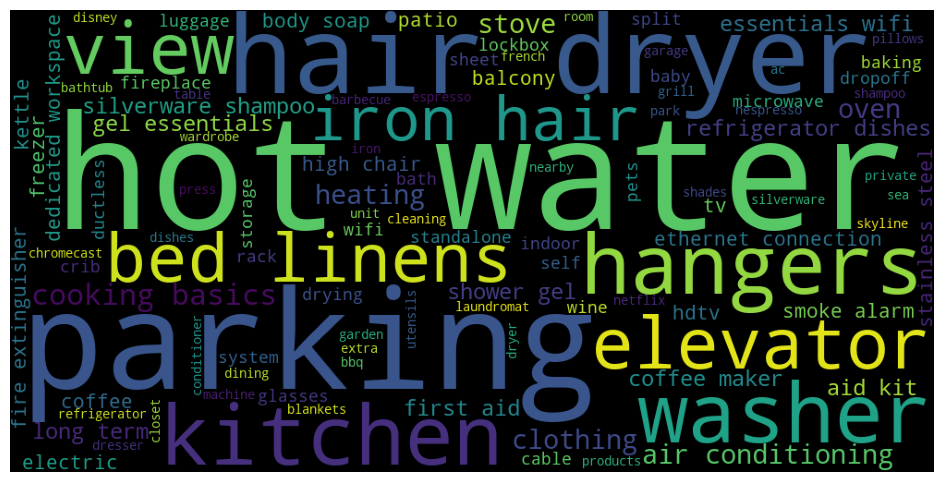

In [64]:
# amenities = df_listings["amenities"].values
# # Remove unwanted keywords
# stop_words = STOPWORDS.update(["free", "available", "upon", "request", "stays", "paid", "u2013", 
#                                "building", "check", "allowed", "central", "single", "standard", 
#                                "lenor", "host", "greets", "crown", "street", "type", "city", 
#                                "premises", "darkening", "harbor"])

# wordcloud = WordCloud(width = 1000, height = 500, stopwords=stop_words).generate(str(amenities).lower())

# plt.figure(figsize=(12,6))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show();

*Create a map of the area that with all the listings*

*Preview the map of the area*

In [81]:
thess_street_map = gpd.read_file(r"C:\Users\theta\OneDrive\Desktop\Data Analyst Bootcamp with Alex the Analyst\Data Analyst Portfolio Projects (updated_data)\Project AirBnB EDA with Python & Tableau\thessaloniki_shapefiles\thessaloniki_area_shapefile.shp")

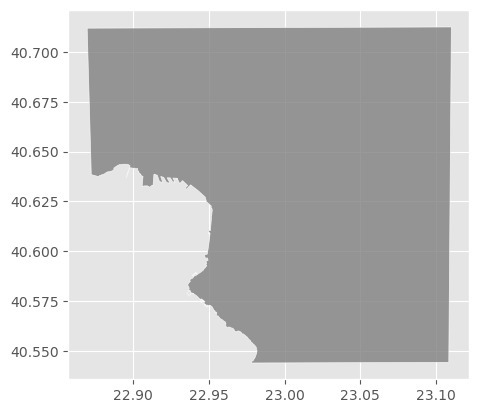

In [82]:
thess_street_map.plot(color="gray", edgecolor="white", markersize=1, alpha=0.8);

*Convert the DataFrame into a GeoDataFrame*

In [83]:
df_geo= pd.read_csv("listings_gz.csv")

In [84]:
df_geo["price"] = df_geo["price"].str.replace(r"\$", "", regex=True).replace(r"\,", "", regex=True)

In [85]:
df_geo["price"] = df_geo["price"].astype(float)

In [86]:
df_geo.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35261,https://www.airbnb.com/rooms/35261,20230921043906,2023-09-21,city scrape,Rental unit in Thessaloniki · ★4.73 · 1 bedroo...,"<b>The space</b><br />My "" home"" is a fully f...",The neighborhood is very lively; there are man...,https://a0.muscache.com/pictures/2634706/75314...,151631,...,4.98,4.76,4.64,NaN,f,2,2,0,0,0.32
1,218831,https://www.airbnb.com/rooms/218831,20230921043906,2023-09-21,city scrape,Rental unit in Kalamaria · 3 bedrooms · 2 beds...,Experience the International Film Festival in ...,Park in front of the building,https://a0.muscache.com/pictures/1953829/3a860...,137588,...,5.00,5.00,5.00,00000049330,f,1,1,0,0,0.02
2,376955,https://www.airbnb.com/rooms/376955,20230921043906,2023-09-21,previous scrape,Rental unit in Thessaloniki · ★4.94 · 3 bedroo...,This is a 3 bedroom apartment in a lovely quit...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1894819,...,4.78,4.68,4.61,NaN,f,1,1,0,0,0.15
3,483128,https://www.airbnb.com/rooms/483128,20230921043906,2023-09-21,city scrape,Condo in Thessaloniki · ★4.80 · 1 bedroom · 1 ...,<b>The space</b><br />This cozy apartment has ...,The apartment is located in the heart of the c...,https://a0.muscache.com/pictures/5941836/084cc...,2358521,...,4.95,4.72,4.74,00000502736,f,1,1,0,0,2.70
4,494816,https://www.airbnb.com/rooms/494816,20230921043906,2023-09-21,city scrape,Rental unit in Ikismos Makedonia · ★4.73 · 2 b...,<b>The space</b><br />In a recently renovated ...,NaN,https://a0.muscache.com/pictures/61c5920c-7c3c...,1977386,...,4.83,4.43,4.81,00001900000,t,22,22,0,0,0.33


*Use the 'longitude' and 'latitude' columns, in order to create points to be added on the map*

In [87]:
geometry = [Point(xy) for xy in zip(df_geo["longitude"], df_geo["latitude"])]

*Create the GeoDataFrame*

In [88]:
df_geo_map = gpd.GeoDataFrame(df_geo, geometry=geometry, crs="EPSG:4326")
df_geo_map.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,35261,https://www.airbnb.com/rooms/35261,20230921043906,2023-09-21,city scrape,Rental unit in Thessaloniki · ★4.73 · 1 bedroo...,"<b>The space</b><br />My "" home"" is a fully f...",The neighborhood is very lively; there are man...,https://a0.muscache.com/pictures/2634706/75314...,151631,...,4.76,4.64,NaN,f,2,2,0,0,0.32,POINT (22.94987 40.63780)
1,218831,https://www.airbnb.com/rooms/218831,20230921043906,2023-09-21,city scrape,Rental unit in Kalamaria · 3 bedrooms · 2 beds...,Experience the International Film Festival in ...,Park in front of the building,https://a0.muscache.com/pictures/1953829/3a860...,137588,...,5.00,5.00,00000049330,f,1,1,0,0,0.02,POINT (22.95667 40.57274)
2,376955,https://www.airbnb.com/rooms/376955,20230921043906,2023-09-21,previous scrape,Rental unit in Thessaloniki · ★4.94 · 3 bedroo...,This is a 3 bedroom apartment in a lovely quit...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1894819,...,4.68,4.61,NaN,f,1,1,0,0,0.15,POINT (22.95394 40.59683)
3,483128,https://www.airbnb.com/rooms/483128,20230921043906,2023-09-21,city scrape,Condo in Thessaloniki · ★4.80 · 1 bedroom · 1 ...,<b>The space</b><br />This cozy apartment has ...,The apartment is located in the heart of the c...,https://a0.muscache.com/pictures/5941836/084cc...,2358521,...,4.72,4.74,00000502736,f,1,1,0,0,2.70,POINT (22.95121 40.63942)
4,494816,https://www.airbnb.com/rooms/494816,20230921043906,2023-09-21,city scrape,Rental unit in Ikismos Makedonia · ★4.73 · 2 b...,<b>The space</b><br />In a recently renovated ...,NaN,https://a0.muscache.com/pictures/61c5920c-7c3c...,1977386,...,4.43,4.81,00001900000,t,22,22,0,0,0.33,POINT (22.94309 40.64763)


*View the map of the Thessaloniki listings with an added price filter*

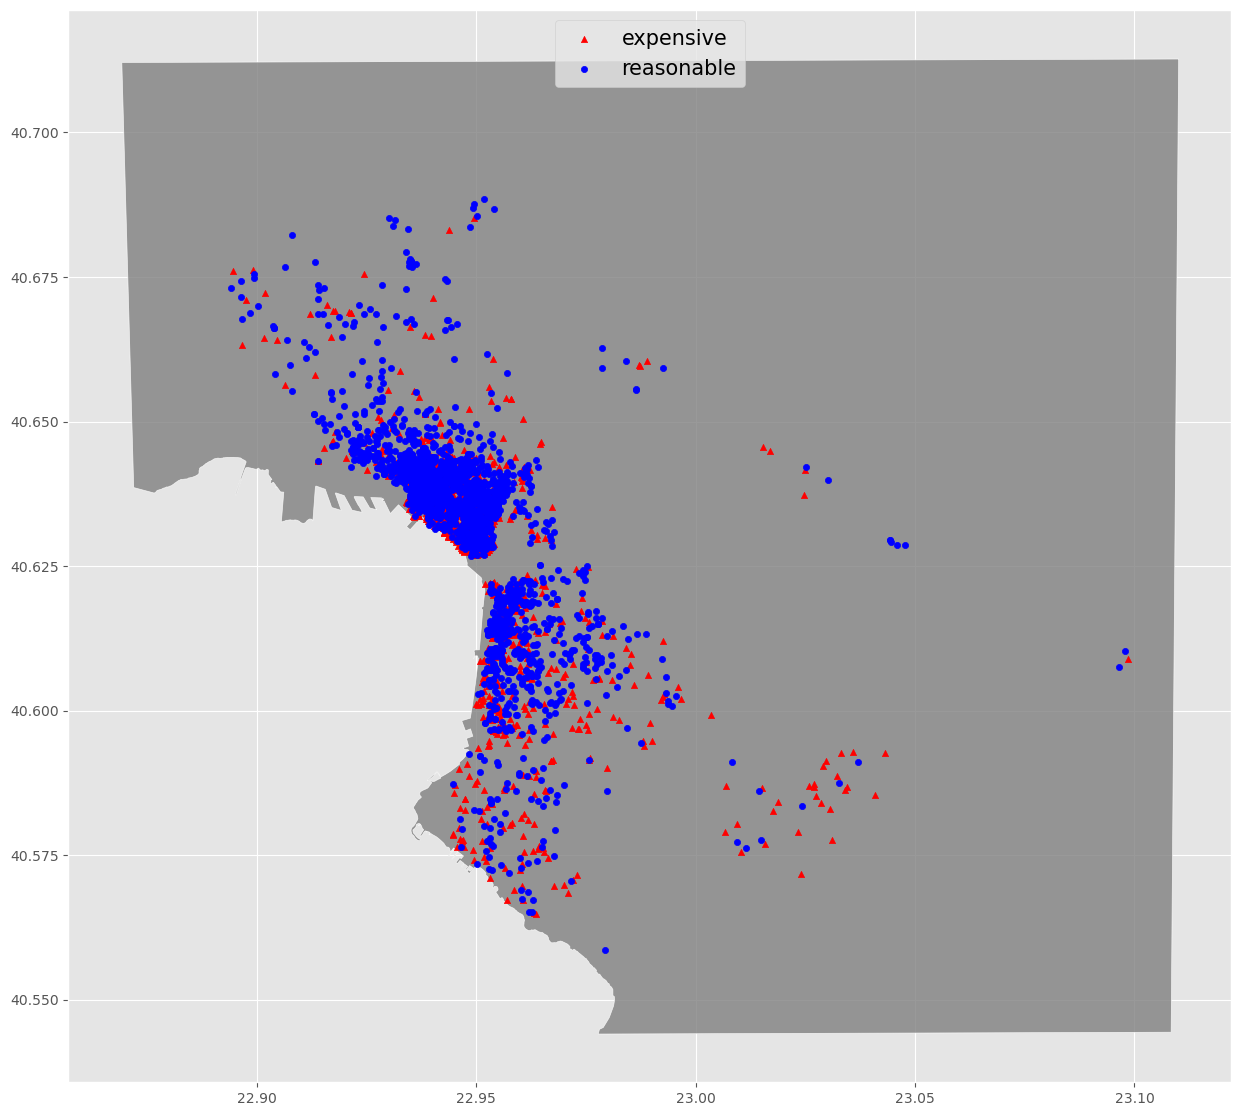

In [89]:
fig, ax = plt.subplots(figsize=(15,15))

thess_street_map.to_crs(df_geo_map.crs).plot(ax=ax, color="gray", edgecolor="white", markersize=1, alpha=0.8)

df_geo_map[df_geo_map["price"] > 60].plot(ax=ax, color="red", marker='^', markersize=20, label="expensive")

df_geo_map[df_geo_map["price"] <= 60].plot(ax=ax, color="blue", marker='o', markersize=20, label="reasonable")

plt.legend(loc="upper center", prop={"size": 15});

*Export DataFrames as EXCEL files in order to be used in Tableau*

In [92]:
#df_filtered_listings.to_excel("df_filtered_listings.xlsx", index=False)

In [93]:
#df_filtered_listings_corr.to_excel("df_filtered_listings_corr.xlsx", index=False)